In [1]:
from pythtb import * # import TB model class
import numpy as np

import matplotlib.pyplot as plt

import ase
import ase.io
import ase.neighborlist
import ase.visualize.plot

In [2]:
geom = ase.io.read("../xyz_files/triangulene.xyz")
lat = [
    [1.0,0.0],
    [0.0,1.0]
]
geom.center(about=0.0)
orb = []

for at in geom:
    orb.append(at.position[:2])

In [10]:
chemical_potential = 0.0

In [11]:
f = open("../processed_ev.txt","r")
#print(f.readline())

num_lines = sum(1 for line in open('../processed_ev.txt', "r"))
print(num_lines)
num_values_evecs = int(num_lines / 2)

evals = np.zeros(num_lines, dtype=float)
evecs_shape = (num_lines, num_values_evecs)
evecs = np.zeros(evecs_shape, dtype=complex)

total_spin_up = np.zeros(int(num_lines/2), dtype=float)
total_spin_down = np.zeros(int(num_lines/2), dtype=float)
up_spins = 0
down_spins = 0


evals_up = np.zeros(num_values_evecs, dtype=float)
evals_down = np.zeros(num_values_evecs, dtype=float)
counter_up = 0
counter_down = 0
    
    
counter = 0
word_count = 0
for line in f:
    #if(counter == 39):
     #   print("Line: " + str(counter))
      #  print(line[:3])
       # print(line)
        
    spin = line[:2]

    line = line[3:]

    splitted_line = line.split(' ')

    evals[counter] = np.float64(splitted_line[0])
    
    if(spin == 'su'):
        evals_up[counter_up] = evals[counter] - chemical_potential
        counter_up = counter_up + 1
    if(spin == 'sd'):
        evals_down[counter_down] = evals[counter] - chemical_potential
        counter_down = counter_down + 1
    
    #print("spin: " + str(spin) + "\teval: " + str(evals[counter]))
    splitted_line.pop(0)
    
    x = ''
    y = ''
    y_turn = False
    
    for j in range(len(splitted_line)):    
        for i in splitted_line[j]:
            if(i == '(' or i == ' '):
                continue
            if(i != ',' and y_turn == False):
                x += i
            elif(i == ','):
                y_turn = True
                continue
            elif(i != ')'):
                y += i
            else:
                evecs[counter, word_count] = complex(float(x), float(y))
                x = ''
                y = ''
                word_count = word_count + 1
                y_turn = False


    word_count = 0
    counter = counter + 1
    
    if(spin == 'su'):
        if(chemical_potential > evals[counter-1]):
            up_spins = up_spins + 1
            total_spin_up = np.add(total_spin_up, np.square(evecs[counter-1]))
    if(spin == 'sd'):
        if(chemical_potential > evals[counter-1]):
            down_spins = down_spins + 1
            total_spin_down = np.add(total_spin_down, np.square(evecs[counter-1]))

print("total up spins: " + str(up_spins))
print("total down spins: " + str(down_spins))
print(total_spin_up)
print(total_spin_down)
spin_difference = ((total_spin_down - total_spin_up))
print(np.shape(spin_difference))
print(spin_difference)

print("evals spin up: " + str(evals_up))
print("evals spin down: " + str(evals_down))

44
total up spins: 10
total down spins: 10
[0.48412501+0.j 0.42411948+0.j 0.48150602+0.j 0.42411976+0.j
 0.48412462+0.j 0.47101581+0.j 0.40196106+0.j 0.42411949+0.j
 0.48412423+0.j 0.40196133+0.j 0.48412432+0.j 0.47101587+0.j
 0.48708735+0.j 0.48412407+0.j 0.42411988+0.j 0.48150506+0.j
 0.4241194 +0.j 0.47101549+0.j 0.48412431+0.j 0.40196152+0.j
 0.42411933+0.j 0.4815056 +0.j]
[0.48409862+0.j 0.42416063+0.j 0.48145269+0.j 0.42416024+0.j
 0.48409868+0.j 0.47103761+0.j 0.4019682 +0.j 0.42416006+0.j
 0.48409888+0.j 0.40196744+0.j 0.48409891+0.j 0.47103849+0.j
 0.48706943+0.j 0.48409912+0.j 0.42416005+0.j 0.4814533 +0.j
 0.42415984+0.j 0.47103838+0.j 0.48409837+0.j 0.40196807+0.j
 0.42416019+0.j 0.481453  +0.j]
(22,)
[-2.6394645e-05+0.j  4.1149702e-05+0.j -5.3328952e-05+0.j
  4.0479451e-05+0.j -2.5937124e-05+0.j  2.1806075e-05+0.j
  7.1324820e-06+0.j  4.0570955e-05+0.j -2.5351840e-05+0.j
  6.1039070e-06+0.j -2.5406160e-05+0.j  2.2624661e-05+0.j
 -1.7919202e-05+0.j -2.4947896e-05+0.j  4.016

In [12]:
ed = num_lines//2
print(num_lines, ed)
homo = ed-1

44 22


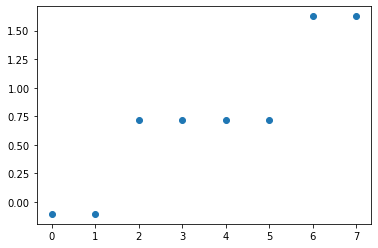

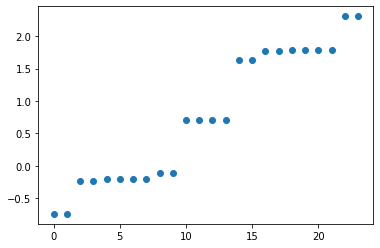

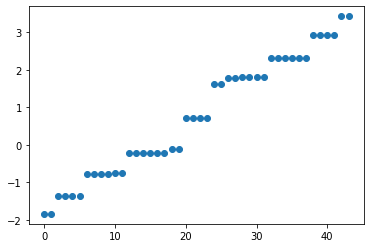

-0.104566
-0.10454
0.714594
0.714594
0.714671
0.714671
1.62612
1.62616


In [13]:
plt.plot(evals[ed-4:ed+4], 'o')
plt.show()

plt.plot(evals[ed-12:ed+12], 'o')
plt.show()

plt.plot(evals[:], 'o')
plt.show()


for ev in evals[ed-4:ed+4]:
    print(ev)



In [14]:
def visualize_backbone(ax, atoms):
    i_arr, j_arr = ase.neighborlist.neighbor_list('ij', atoms, 1.8)
    for i, j in zip(i_arr, j_arr):
        if i < j:
            p1 = atoms.positions[i]
            p2 = atoms.positions[j]
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-', linewidth=3.0, solid_capstyle='round')
            
def visualize_evec(ax, atoms, evec):
    for at, e in zip(atoms, evec):
        p = at.position
        mod = np.abs(e)
        phase = np.angle(e)/np.pi
        col = (1.0-phase, 0.0, phase)
        circ = plt.Circle(p[:2], np.cbrt(mod), color=col, zorder=10)
        ax.add_artist(circ)

(-5, 5)

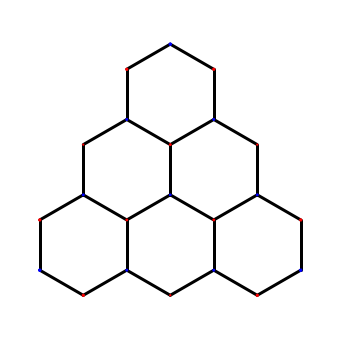

In [15]:
fig=plt.figure(figsize=(6,6))
ax = plt.gca()
ax.set_aspect('equal')
visualize_backbone(ax, geom)
visualize_evec(ax, geom, spin_difference)
plt.axis('off')
plt.xlim([-5, 5])
plt.ylim([-5, 5])

#plt.savefig("../figures_trang/spin_diff.png", dpi=300, bbox_inches='tight')

ValueError: RGBA values should be within 0-1 range

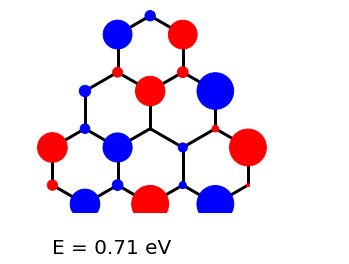

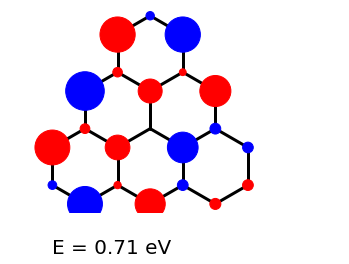

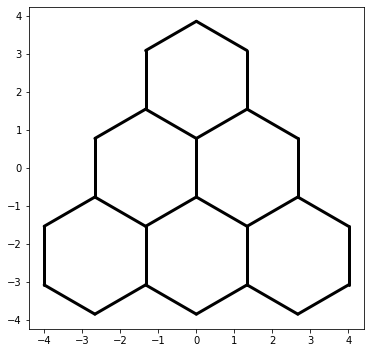

In [16]:
for ind in range(ed-2,ed+2):
    fig=plt.figure(figsize=(6,6))
    ax = plt.gca()
    ax.set_aspect('equal')
    visualize_backbone(ax, geom)
    visualize_evec(ax, geom, evecs[ind,:])
    plt.axis('off')
    xmin = np.min(geom.positions[:, 0])-2.0
    xmax = np.max(geom.positions[:, 0])+2.0
    ymin = np.min(geom.positions[:, 1])-2.0
    ymax = np.max(geom.positions[:, 1])+4.0
    plt.xlim([xmin, xmax])
    plt.xlim([ymin, ymax])
    plt.text(xmin+2.0, ymin, "E = %.2f eV" % evals[ind], fontsize=20)
    #plt.savefig("../figures_phenalenyl/orb_%d_%d.png" % (ind, ind-homo), dpi=300, bbox_inches='tight')

Down spin ev: -1.8405
Down spin ev: -1.37069
Down spin ev: -1.37069
Down spin ev: -0.780309
Down spin ev: -0.780309
Down spin ev: -0.741074
Down spin ev: -0.229299
Down spin ev: -0.205711
Down spin ev: -0.205711
Down spin ev: -0.10454
Up spin ev: -1.8405
Up spin ev: -1.37069
Up spin ev: -1.37069
Up spin ev: -0.780313
Up spin ev: -0.780313
Up spin ev: -0.741077
Up spin ev: -0.22927
Up spin ev: -0.205727
Up spin ev: -0.205727
Up spin ev: -0.104566


(-1.8, 1.8)

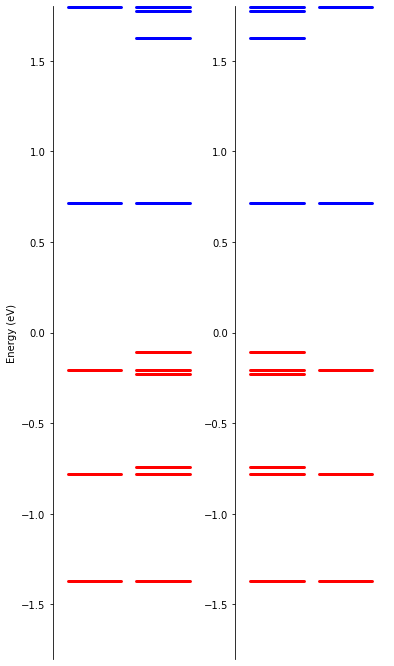

In [17]:
chemical_potential = 0 #0.875
past_ev = -100


fig = plt.figure(figsize=(6, 12))
plt.subplot(121)
ax = plt.gca()
for ev in evals_down:
    col = 'blue'
    if ev < 0.0:
        col = 'red'
        print("Down spin ev: " + str(ev))
    if(ev > past_ev + 0.001):
        plt.plot([0.55, 0.9], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    else:
        plt.plot([0.1, 0.45], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    past_ev = ev


ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
plt.ylim(-1.8, 1.8)
plt.ylabel("Energy (eV)")

###

plt.subplot(122)
ax = plt.gca()
for ev in evals_up:
    
    col = 'blue'
    if ev < 0.0:
        col = 'red'
        print("Up spin ev: " + str(ev))
    if(ev > past_ev + 0.005):
        plt.plot([0.1, 0.45], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    else:
        plt.plot([0.55, 0.9], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    past_ev = ev
    
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
plt.ylim(-1.8, 1.8)
#plt.ylabel("Energy (eV)")

#plt.savefig("../figures_phenalenyl/spin_eigenvalues.png", dpi=300, bbox_inches='tight')



Text(0, 0.5, 'Energy (eV)')

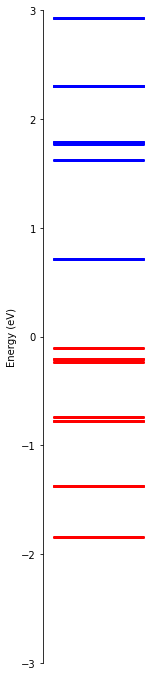

In [18]:
fig = plt.figure(figsize=(2, 12))
ax = plt.gca()
for ev in evals[ed-ed:ed*2]:
    col = 'blue'
    if ev < 0.0:
        col = 'red'
    plt.plot([0.1, 0.9], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
plt.ylim(-3.0, 3.0)
plt.ylabel("Energy (eV)")
#plt.savefig("../figures/phenalenyl/levels.png", dpi=300, bbox_inches='tight')